# Photonic circuits in QISKIT

In [1]:
import qoptkit                                   # QOPTKIT module
import numpy as np                               # Numpy
from math  import acos,sqrt,pi                   # Mathematical module
from qiskit import Aer,QuantumCircuit            # QISKIT Tools 
from qiskit.visualization import plot_histogram  # QISKIT Visualization tools

## 1 Designing photonic circuits

<p style='text-align: justify'> We have shown how a linear optical circuit can be used to implement the general qubit rotations rx,ry,rz and also the two qubit CZ operation. Therefore, we can choose any logical circuit defined using QISKIT and translate that circuit into an optical circuit. As shown next, the process is straightforward. </p>

### Translation by substitution

<p style='text-align: justify'> A logical circuit defined in QISKIT can be transpiled into an equivalent version made of the four gates rx,ry,rx and CZ that we can implement with optical elements. Then each of these gates is substituted by its optical counterpart. Let's put an example. First we are going to create and arbitrary circuit, </p>

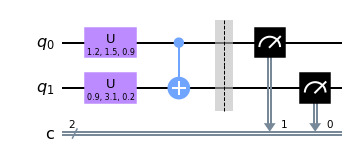

In [2]:
q_circuit=QuantumCircuit(2,2)
q_circuit.u(1.2,1.5,0.9,0)
q_circuit.u(0.9,3.1,0.2,1)
q_circuit.cx(0,1)
q_circuit.barrier()
q_circuit.measure(0,1)
q_circuit.measure(1,0)
q_circuit.draw(output='mpl')

<p style='text-align: justify'>  It is usual in quantum optics literature that channel <i>"0"</i> is represented as the most significant bit of the result. By extension, this also applies for qubits. This is, a "01" outcome means q0=0 and q1=1. However, QISKIT  works the other way around. Qubit 0 is the least significant bit of the result. Therefore, when comparison between the two kind of circuits has to be made it is important to remember to invert the order in which the qubits are measured into classical bits. In our example this means that qubit 0 is assigned to classical bit 1 q0->c1 and q1->c0. </p>

Now we can simulate this circuit and plot the results.

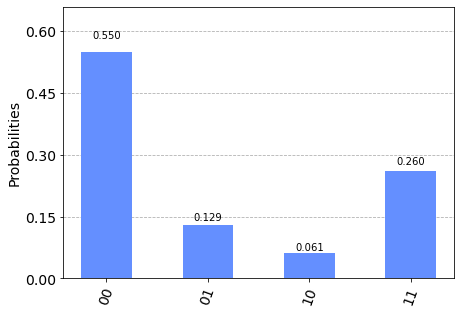

In [3]:
qiskitsim = Aer.get_backend('aer_simulator') 
result = qiskitsim.run(q_circuit, shots=100000).result()
counts = result.get_counts()
plot_histogram(counts)

This circut can be transpiled into its corresponding optical version.

In [4]:
compiler=qoptkit.compiler()  
opt_circuit,cond,ancillas,pselect, oV=compiler.transpile(q_circuit)

The whole process has been done automatically. First the circuit is transpiled,

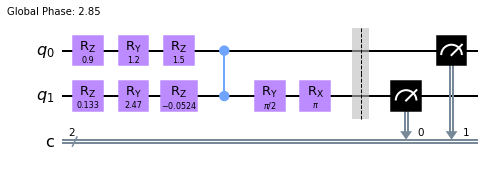

In [5]:
oV.draw(output='mpl')

An then the substitution is carried out.

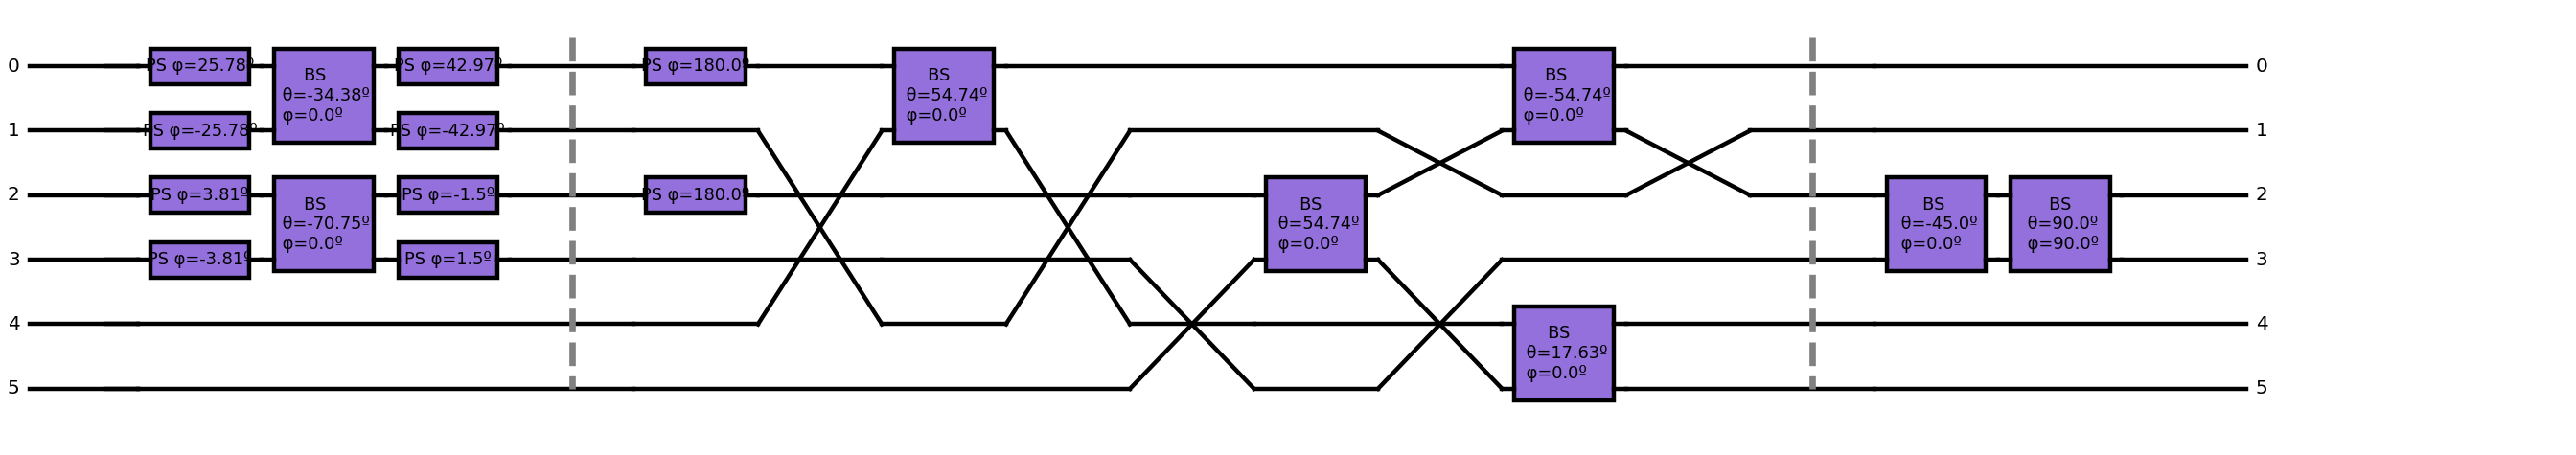

In [6]:
opt_circuit.show(depth=22,sizexy=80,font=18)

<p style='text-align: justify'> A simulation will show how both circuits (the logical and the optical) provide the same results. Note that the optical simulation is performed for an input state that corresponds to a logical qubit value 00.  QISKIT assumes by default that qubits are initialized to zero because it is easier to initialize superconductor qubits to this value. This is the reason because the optical simulation has to be also initialized to 0 to make the results comparable. </p>

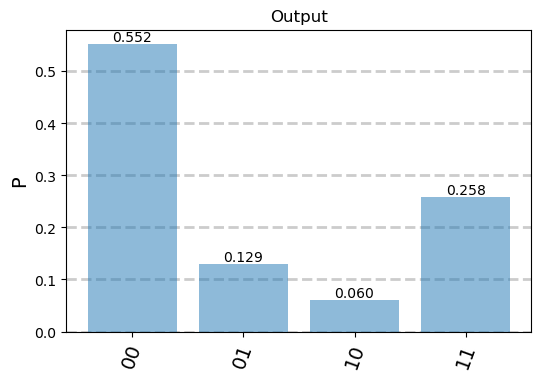

In [7]:
qubit= qoptkit.state(2,st=[ [1.0,[0,0]] ])
inputst=qubit.decode(cond,ancillas,opt_circuit)
soqssim=qoptkit.simulator() 
outstate=soqssim.run(inputst,opt_circuit)
pselected=outstate.post_selection(pselect)
encoded_state=pselected.encode(cond, opt_circuit)
encoded_state.normalize()
encoded_state.show(sizex=6,sizey=4)

## 2 Obtaining logic from optical circuits.

<p style='text-align: justify'>  As an attentive reader you may be wondering if it is possible to perform the opposite operation. Given an optical circuit may I obtain the logic of this circuit? Let's draw a arbitrary linear circuit inspired by the CNOT [4] and to calculate its output for a 00 qubit input. </p>

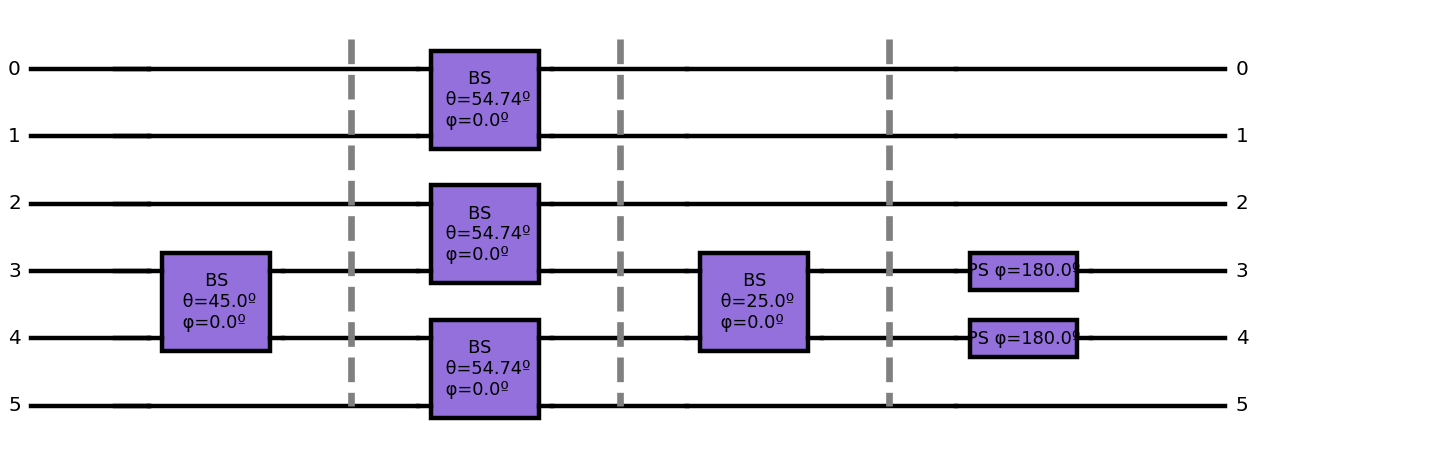

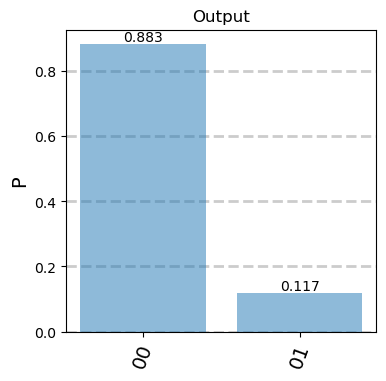

In [8]:
# Create circuit
cond=[[1, 2],[3, 4]]
opt_circuit = qoptkit.qocircuit(6);
opt_circuit.bs(3,4,               45.0,0.0)
opt_circuit.barrier()
opt_circuit.bs(0,1,180*acos(1.0/sqrt(3.0))/pi,0.0)
opt_circuit.bs(2,3,180*acos(1.0/sqrt(3.0))/pi,0.0)
opt_circuit.bs(4,5,180*acos(1.0/sqrt(3.0))/pi,0.0)
opt_circuit.barrier()
opt_circuit.bs(3,4,               25.0,0.0)
opt_circuit.barrier()
opt_circuit.ph(3, 180)
opt_circuit.ph(4, 180)
opt_circuit.show(sizexy=80,depth=12)


# Calculate probability distribution in QOKIT
inputst= qoptkit.state(6,st=[ [1.0,[0,0,1,0,1,0]]])
outstate=soqssim.run(inputst,opt_circuit )
pselected=outstate.post_selection([0,-1,-1,-1,-1,0])
encoded_state=pselected.encode(cond, opt_circuit)
encoded_state.normalize()
encoded_state.show(sizex=4,sizey=4)

<p style='text-align: justify'> Next, we obtain the corresponding logical circuit using the proper QoptKIT instruction. We have to specify the gates that are allowed to be used to build the resulting logical circuit, </p>

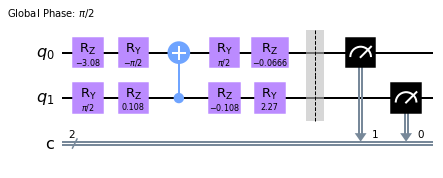

In [9]:
q_circuit=compiler.assemble(cond,cond,[0,0,0,0,0,0],[0,-1,-1,-1,-1,0],['id','rx','ry','rz','cx'],opt_circuit,measure='qoptkit')
q_circuit.draw(output="mpl")

Finally, we can perform a QISKIT simulation to check that both circuits are equivalent.

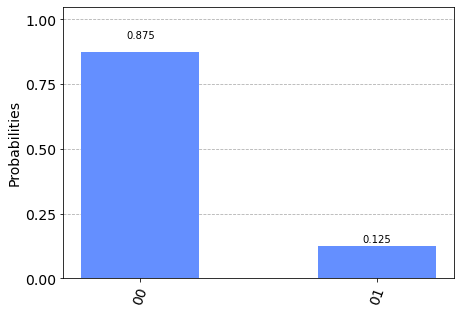

In [10]:
qiskitsim = Aer.get_backend('aer_simulator') 
result = qiskitsim.run(q_circuit).result()
counts = result.get_counts()
plot_histogram(counts)

<p style='text-align: justify'> Note that after post-selection and encoding a linear optical circuit may not be represented by a unitary matrix. Therefore the process of translation will fail if the optical circuit does not have an equivalent logical circuit. </p>

**THIS CODE IS PART OF QoptKIT** <br>

**Copyright:** <br>
Copyright © 2023 National University of Ireland Maynooth, Maynooth University.

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the <a href="./LICENSE.TXT">License</a>